<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
## Recupero dati da Binance

In [105]:
!pip install binance-connector

In [106]:
from binance.spot import Spot as Client
import pandas as pd

In [107]:
## Recupero dalle Api di Binance i dati di Cardano
spot_client = Client(base_url="https://api.binance.com")
data = spot_client.klines("ADAUSDT", "1m", limit=1000)

In [ ]:
## Converto la risposta delle Api in un Dataframe di Pandas
df = pd.DataFrame(data)

In [108]:
## Stampo il Dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1652528520000,0.51020000,0.51100000,0.50810000,0.50830000,353549.60000000,1652528579999,180176.06138000,535,208869.30000000,106446.00089000,0
1,1652528580000,0.50820000,0.50820000,0.50590000,0.50790000,384949.60000000,1652528639999,195285.38549000,667,179130.70000000,90874.92222000,0
2,1652528640000,0.50780000,0.50780000,0.50630000,0.50710000,216809.70000000,1652528699999,109930.34609000,317,117157.20000000,59404.92805000,0
3,1652528700000,0.50710000,0.51060000,0.50700000,0.50990000,243239.30000000,1652528759999,123796.78952000,409,142660.50000000,72573.20058000,0
4,1652528760000,0.50990000,0.51000000,0.50770000,0.50800000,241601.40000000,1652528819999,122881.97718000,352,108335.80000000,55081.51463000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1652588220000,0.52230000,0.52400000,0.52220000,0.52330000,268168.50000000,1652588279999,140273.34178000,281,137429.40000000,71892.62688000,0
996,1652588280000,0.52330000,0.52410000,0.52290000,0.52400000,321155.90000000,1652588339999,168117.06257000,336,138150.20000000,72328.15814000,0
997,1652588340000,0.52410000,0.52420000,0.52350000,0.52390000,107525.00000000,1652588399999,56337.35401000,153,30631.10000000,16046.93904000,0
998,1652588400000,0.52390000,0.52400000,0.52290000,0.52290000,22571.50000000,1652588459999,11815.16490000,57,4026.10000000,2107.11929000,0


In [109]:
## Converto il Timestamp in Datatime
df[0] = (pd.to_datetime(df[0],unit='ms'))

In [110]:
## Elimino le colonne che non uso
df = df.drop(columns=[6, 7, 8, 9, 10, 11])

In [111]:
## Do dei nomi alle colonne
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [112]:
df

,Date,Open,High,Low,Close,Volume
0,2022-05-14 11:42:00,0.51020000,0.51100000,0.50810000,0.50830000,353549.60000000
1,2022-05-14 11:43:00,0.50820000,0.50820000,0.50590000,0.50790000,384949.60000000
2,2022-05-14 11:44:00,0.50780000,0.50780000,0.50630000,0.50710000,216809.70000000
3,2022-05-14 11:45:00,0.50710000,0.51060000,0.50700000,0.50990000,243239.30000000
4,2022-05-14 11:46:00,0.50990000,0.51000000,0.50770000,0.50800000,241601.40000000
...,...,...,...,...,...,...
995,2022-05-15 04:17:00,0.52230000,0.52400000,0.52220000,0.52330000,268168.50000000
996,2022-05-15 04:18:00,0.52330000,0.52410000,0.52290000,0.52400000,321155.90000000
997,2022-05-15 04:19:00,0.52410000,0.52420000,0.52350000,0.52390000,107525.00000000
998,2022-05-15 04:20:00,0.52390000,0.52400000,0.52290000,0.52290000,22571.50000000


In [113]:
## Formula SMA

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

In [114]:
## Grafico chiusure di Cardano

In [115]:
import matplotlib.pyplot as plt

In [116]:
## Converto il formato della colonna Close
df["Close"] = df["Close"].astype(float)

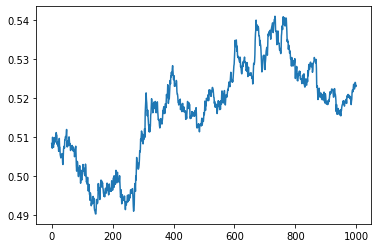

In [117]:
## Grafico la colonna Close
df["Close"].plot()